# In Class Project



The dataset has been taken from Kaggle. (https://www.kaggle.com/crowdflower/twitter-airline-sentiment/home)
This is a dataset having tweets about 6 US Airlines along with their sentiments: positive, negative and neutral.

You are provided with two files: ‘Tweets-train.csv” and ‘Tweets-test.csv”
The train data contains about 11000 tweets and test contains 4000 tweets. You have to perform Sentiment Analysis on the dataset and also built a classifier on the training data.


### Question 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Read the training using pandas module and select only the sentiment and text columns

In [2]:
#Reading the data set
import pandas as pd
train=pd.read_csv('/content/drive/My Drive/edureka NLP/class 6/Tweets-train.csv')

#Selecting only sentiment and tweet column from the entire data set
train=train[['airline_sentiment','text']]

In [3]:
train.head()

,airline_sentiment,text
0,positive,@VirginAmerica plus you've added commercials t...
1,neutral,@VirginAmerica I didn't today... Must mean I n...
2,negative,@VirginAmerica it's really aggressive to blast...
3,negative,@VirginAmerica and it's a really big bad thing...
4,positive,"@VirginAmerica yes, nearly every time I fly VX..."


### Question 2



```
# This is formatted as code
```

•	Observe randomly generated 10 tweets for each sentiment with respect to the following:
o	Text contains references with ‘@’
o	Text contains links (http , https )
o	Text contains punctuations
o	Text contains Emoticons 

In [4]:
#See some positive sentiments
for each in train[train['airline_sentiment']=="positive"].sample(20,random_state=10)['text']:
    print(each) 
    print 

@USAirways it was customer service like I have never seen before!  Kudos to your organization.
@AmericanAir I love your company and your staff is amazing. They just made an uncomfortable situation comfortable
@united I appreciate the follow up.
@JetBlue boarding the back of the airplane first. Like a boss. #sosmart #jetblue #frequentflyerappreciates #alsoyayforsnacks
@AmericanAir mission accomplished today, Thank you!
@united thnx
@united thank you for following up!
@JetBlue thanks so much!! ❤️✨ very relaxing flight!
@USAirways thanks for seating me next to 2 hot athletes. This flight is significantly better now!
@united awesome new plane flight 1701
@USAirways FYI your customer service rep Carol is an absolute delight. So pleasant to with with and rebooked me in lightning speed! Thanks!
@SouthwestAir It was the usually excellent SWA flight!
@united thanks for the epic service on 863- always a pleasure- outstanding crew http://t.co/trqlpeinzW
@SouthwestAir @AmericanAir y'all are better

In [5]:
#See some negative sentiments
for each in train[train['airline_sentiment']=="negative"].sample(20,random_state=10)['text']:
    print(each) 
    print

@AmericanAir continues to win: I've never missed a flight before, but a nice little quiet gate change made it possible. Sheesh.
@united is that all that matters, not the fact that we're at a different destination, we were put through a tremendous amount of stress,
@USAirways your lack of customer service has shined. I need you to step up and get my lost baggage to delta. So they can return it to me.
@united Terribly disappointed. Confirmed reservation delayed and your cust. service staff was not helpful in finding an alternate solution.
@united what is this subtlety gate changes? Are you kidding with me?
@SouthwestAir and now no wifi??? Come on.
@JetBlue is flight 51 on 4/24/15 moved back? When I booked it said we arrive 11:31 but now it says 12:08 😢
@AmericanAir complt incompetence on flt 295.Lav delay from a pln that lnded last nite, no internet and poor svc. Not what I expect from u.
@united @annricord 0162431184663.
3 of your agents said we would be refunded. Agents said United sho

In [6]:
#See some neutral sentiments
for each in train[train['airline_sentiment']=="neutral"].sample(20,random_state=10)['text']:
    print(each) 
    print

@JetBlue you guys get rid of the hip hop stations on Sirius XM?
@JetBlue deal!
@united can I request a ticket change through twitter ?
@united My mom left her Kindle on flight 1544 today. Burgundy case with a light. Seat 27D. Did anyone find it?
@USAirways am 2. 1/2 hours from airport sure would like to talk to someone
@JetBlue well I'm not sure I'm that bold! lol or are you saying you didn't believe me?? :P
@united can you send me another confirmation email?
@SouthwestAir first time flyer, scheduled a (round)trip. set on departure date not sure on returning date, policy/fees on changing Re Flight
@SouthwestAir still haven't been able to get through, thanks for responding
@USAirways we even offered to fly in to another airport and they said they couldn't do that. No explanation why they can't.
@VirginAmerica no A's channel this year?
@VirginAmerica missed my flight. How does standby work?
@united Hi. My 2/23 flight from CUN-EWR shows a departure of 2:55pm on my United app.  Can you con

## What are the observations ?


#### 1.  Data contains words starting with '@'

#### 2.  Data contains words having '#' 

#### 3.  Data contains links 'https:...."

#### 4. Data contains emoticons and punctuations such as ' , . ; ❤️✨ ! etc etc

The next step can be to clean the data and remove such things as they are not going to help in classifer model.

In [10]:
#@ mentions(testing)
import re

print(train.text[5])
print() 
print(re.sub(r'@+','',train.text[5]))

@virginamerica Well, I didn't…but NOW I DO! :-D

virginamerica Well, I didn't…but NOW I DO! :-D


In [11]:
#Links (testing)

print(train.text[10])
print() 
print(re.sub('http?://[A-Za-z0-9./]+','',train.text[10]))


@VirginAmerica @virginmedia I'm flying your #fabulous #Seductive skies again! U take all the #stress away from travel http://t.co/ahlXHhKiyn

@VirginAmerica @virginmedia I'm flying your #fabulous #Seductive skies again! U take all the #stress away from travel 


In [12]:
# selects only aplhabets numbers so that punctuations and emoticons are removed(testing).

print(train.text[22])
print() 
print(re.sub("[^a-zA-Z0-9]", " ",train.text[22]))
print() 
print() 
print(train.text[5977])
print() 
print(re.sub("[^a-zA-Z0-9]", " ",train.text[5977]))

@VirginAmerica amazing to me that we can't get any cold air from the vents. #VX358 #noair #worstflightever #roasted #SFOtoBOS

 VirginAmerica amazing to me that we can t get any cold air from the vents   VX358  noair  worstflightever  roasted  SFOtoBOS


@JetBlue thanks so much!! ❤️✨ very relaxing flight!

 JetBlue thanks so much       very relaxing flight 


### Question 3

You have to prepare a function to clean all the above observed tokens from the tweet text.
Save changes in a new column 


In [13]:
#cleans + potkenize + joins
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
import re
def tweet_cleaner1(text):
    text=re.sub(r'@+','',text)
    text=re.sub('http?://[A-Za-z0-9./]+','',text)
    text=re.sub("[^a-zA-Z]", " ",text)
    lower_case = text.lower()
    words = tokenizer.tokenize(lower_case)
    return (" ".join(words)).strip()

In [14]:
train['Cleaned-Text']=train['text'].apply(tweet_cleaner1)

In [15]:
train.head(4)

,airline_sentiment,text,Cleaned-Text
0,positive,@VirginAmerica plus you've added commercials t...,virginamerica plus you ve added commercials to...
1,neutral,@VirginAmerica I didn't today... Must mean I n...,virginamerica i didn t today must mean i need ...
2,negative,@VirginAmerica it's really aggressive to blast...,virginamerica it s really aggressive to blast ...
3,negative,@VirginAmerica and it's a really big bad thing...,virginamerica and it s a really big bad thing ...


In [17]:
for each in train[train['airline_sentiment']=="positive"].sample(5,random_state=10)['text']:
    print(each) 
    print 

@USAirways it was customer service like I have never seen before!  Kudos to your organization.
@AmericanAir I love your company and your staff is amazing. They just made an uncomfortable situation comfortable
@united I appreciate the follow up.
@JetBlue boarding the back of the airplane first. Like a boss. #sosmart #jetblue #frequentflyerappreciates #alsoyayforsnacks
@AmericanAir mission accomplished today, Thank you!


In [19]:
for each in train[train['airline_sentiment']=="positive"].sample(5,random_state=10)['Cleaned-Text']:
    print(each) 
    print 

usairways it was customer service like i have never seen before kudos to your organization
americanair i love your company and your staff is amazing they just made an uncomfortable situation comfortable
united i appreciate the follow up
jetblue boarding the back of the airplane first like a boss sosmart jetblue frequentflyerappreciates alsoyayforsnacks
americanair mission accomplished today thank you


In [40]:
import re

sentence = "This is a good @indigo"

test = re.search(r'@\s*([^\n]+)', sentence)
test.group(1)

'indigo'

### Question 4

List down the most common 15 words for each sentiment. Observe the results

negative
[('to', 4326), ('i', 3313), ('the', 3021), ('a', 2344), ('flight', 2113), ('united', 2101), ('and', 2049), ('on', 2023), ('for', 1999), ('you', 1959), ('my', 1726), ('usairways', 1722), ('americanair', 1549), ('is', 1526), ('t', 1327)]


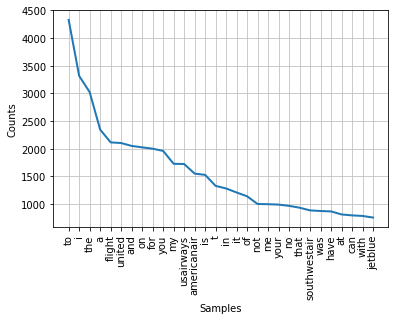


neutral
[('to', 1185), ('i', 1004), ('the', 730), ('a', 616), ('you', 561), ('jetblue', 540), ('united', 530), ('southwestair', 489), ('on', 479), ('for', 443), ('flight', 436), ('my', 391), ('is', 372), ('americanair', 363), ('in', 355)]


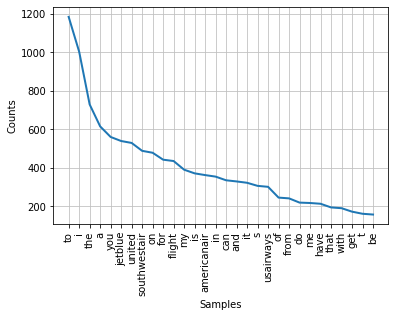


positive
[('the', 690), ('to', 675), ('you', 672), ('i', 555), ('for', 493), ('thanks', 448), ('jetblue', 443), ('southwestair', 424), ('a', 385), ('united', 376), ('thank', 336), ('and', 306), ('flight', 269), ('my', 263), ('americanair', 254)]


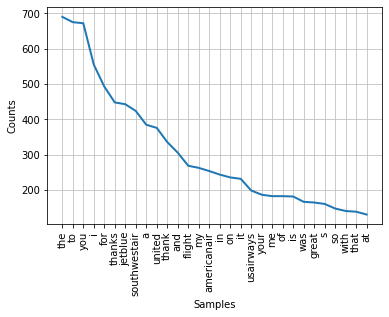

In [41]:
#See some words in All sentiments
from nltk.probability import FreqDist
import matplotlib as plt
from collections import Counter
for group_name,subset in train.groupby('airline_sentiment'):
    sentimentData=subset['Cleaned-Text']
    words=[]
    for each in sentimentData:
        words.extend(each.split(" "))
    print(group_name)
    print(Counter(words).most_common(15))
    fdist = FreqDist(words)
    fdist.plot(30,cumulative=False)
    print() 
    

We observe that most of the frequencies are of stopwords , so let's remove them 

### Question 5

Remove Stopwords from all the tweets.
Save changes in a new column and list down most common 15 words.


In [ ]:
punctuation=re.compile(r'[-.?!,:;()|0-9]')
post_punctuation=[]
def Removepunc(gold_word_tokenize):
    for words in gold_word_tokenize:
        word=punctuation.sub("",words)
        if len(word)>0:
            post_punctuation.append(word)
    return post_punctuation

In [ ]:
train['Cleaned-Text'].head()

0    virginamerica plus you ve added commercials to...
1    virginamerica i didn t today must mean i need ...
2    virginamerica it s really aggressive to blast ...
3    virginamerica and it s a really big bad thing ...
4    virginamerica yes nearly every time i fly vx t...
Name: Cleaned-Text, dtype: object

In [42]:
def RemoveStopWords(post_punctuation):
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    stp_words=stopwords.words('english')
    post_stop_words=[]
    word_tokenize = word_tokenize(post_punctuation)
    for words in word_tokenize:
        words=words.lower()
        if words not in stp_words:
            post_stop_words.append(words)           
    return (" ".join(post_stop_words)).strip()

In [43]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [44]:
train['Clean-Text-StopWords-Removed']=train['Cleaned-Text'].apply(RemoveStopWords)

negative
[('flight', 2113), ('united', 2101), ('usairways', 1722), ('americanair', 1549), ('southwestair', 884), ('jetblue', 755), ('get', 728), ('cancelled', 648), ('service', 530), ('hours', 502), ('help', 443), ('customer', 428), ('time', 426), ('hold', 424), ('plane', 387)]


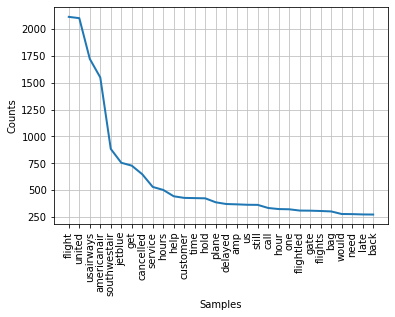



neutral
[('jetblue', 540), ('united', 530), ('southwestair', 489), ('flight', 436), ('americanair', 363), ('usairways', 302), ('get', 173), ('please', 132), ('virginamerica', 130), ('flights', 130), ('help', 121), ('thanks', 115), ('need', 114), ('would', 92), ('dm', 91)]


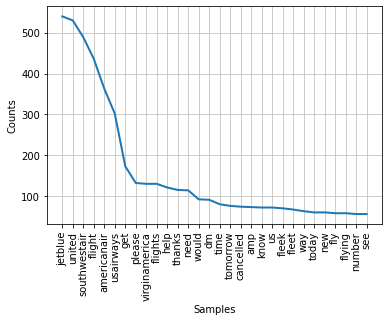



positive
[('thanks', 448), ('jetblue', 443), ('southwestair', 424), ('united', 376), ('thank', 336), ('flight', 269), ('americanair', 254), ('usairways', 199), ('great', 165), ('service', 120), ('virginamerica', 114), ('love', 105), ('best', 85), ('customer', 85), ('good', 82)]


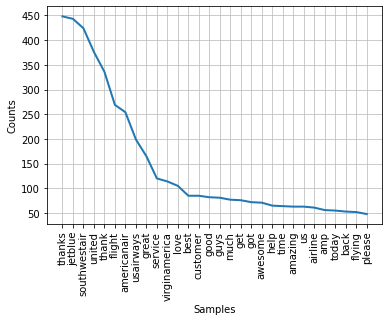

In [45]:
#Again let's see the counts of most common words after removing stopwords.

from collections import Counter
for group_name,subset in train.groupby('airline_sentiment'):
    sentimentData=subset['Clean-Text-StopWords-Removed']
    words=[]
    for each in sentimentData:
        words.extend(each.split(" "))
    print(group_name)
    print(Counter(words).most_common(15))
    fdist = FreqDist(words)
    fdist.plot(30,cumulative=False)
    print() 
    print()
    

### Question 6

**Remove** these words from all the tweets.

americanair, united, delta, southwestair, jetblue, virginamerica, usairways, flight, plane

Save changes in a new column and list down most common 15 words.


In [46]:
def RemoveExplicitlyMentionedWords(string,listofWordsToRemove):
    listOfAllWords=string.split(" ")
    listOfWords= [x for x in listOfAllWords if x not in listofWordsToRemove]
    return (" ".join(listOfWords)).strip()    

In [47]:
train['Cleaned-Text'].apply(RemoveStopWords)

0        virginamerica plus added commercials experienc...
1        virginamerica today must mean need take anothe...
2        virginamerica really aggressive blast obnoxiou...
3                       virginamerica really big bad thing
4        virginamerica yes nearly every time fly vx ear...
                               ...                        
10635                                   americanair thanks
10636    americanair tilleymonsta george look good plea...
10637    americanair please bring american airlines bla...
10638    americanair money change flight answer phones ...
10639    americanair ppl need know many seats next flig...
Name: Cleaned-Text, Length: 10640, dtype: object

In [48]:
train.head()

,airline_sentiment,text,Cleaned-Text,Clean-Text-StopWords-Removed
0,positive,@VirginAmerica plus you've added commercials t...,virginamerica plus you ve added commercials to...,virginamerica plus added commercials experienc...
1,neutral,@VirginAmerica I didn't today... Must mean I n...,virginamerica i didn t today must mean i need ...,virginamerica today must mean need take anothe...
2,negative,@VirginAmerica it's really aggressive to blast...,virginamerica it s really aggressive to blast ...,virginamerica really aggressive blast obnoxiou...
3,negative,@VirginAmerica and it's a really big bad thing...,virginamerica and it s a really big bad thing ...,virginamerica really big bad thing
4,positive,"@VirginAmerica yes, nearly every time I fly VX...",virginamerica yes nearly every time i fly vx t...,virginamerica yes nearly every time fly vx ear...


In [50]:
for each in train[train['airline_sentiment']=="positive"].sample(1,random_state=10)['text']:
    print(each) 
    print 

@USAirways it was customer service like I have never seen before!  Kudos to your organization.


In [51]:
for each in train[train['airline_sentiment']=="positive"].sample(1,random_state=10)['Clean-Text-StopWords-Removed']:
    print(each) 
    print 

usairways customer service like never seen kudos organization


In [52]:
list_of_words_to_remove=['americanair','united','delta','southwestair','jetblue','virginamerica','usairways','flight','plane']
train['Final-Wrangled-Text']=train['Clean-Text-StopWords-Removed'].apply(RemoveExplicitlyMentionedWords,listofWordsToRemove=list_of_words_to_remove)

negative
[('get', 728), ('cancelled', 648), ('service', 530), ('hours', 502), ('help', 443), ('customer', 428), ('time', 426), ('hold', 424), ('delayed', 371), ('amp', 368), ('us', 364), ('still', 363), ('call', 334), ('hour', 324), ('one', 322)]


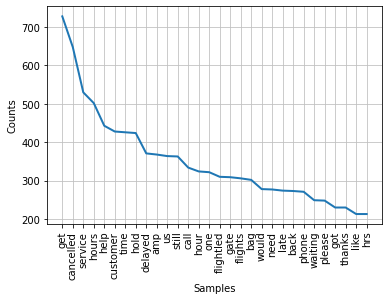


neutral
[('get', 173), ('please', 132), ('flights', 130), ('help', 121), ('thanks', 115), ('need', 114), ('would', 92), ('dm', 91), ('time', 80), ('tomorrow', 76), ('cancelled', 74), ('amp', 73), ('know', 72), ('us', 72), ('fleek', 70)]


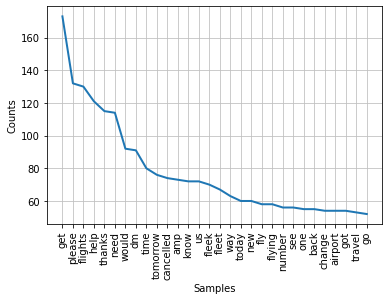


positive
[('thanks', 448), ('thank', 336), ('great', 165), ('service', 120), ('love', 105), ('best', 85), ('customer', 85), ('good', 82), ('guys', 81), ('much', 77), ('get', 76), ('got', 72), ('awesome', 71), ('help', 65), ('time', 64)]


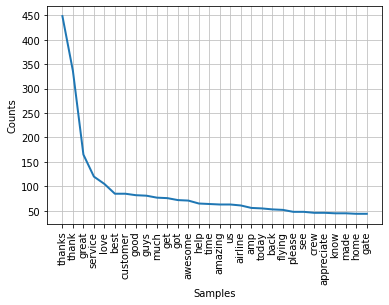

In [53]:
#Count Again words in All sentiments
from collections import Counter
for group_name,subset in train.groupby('airline_sentiment'):
    sentimentData=subset['Final-Wrangled-Text']
    words=[]
    for each in sentimentData:
        words.extend(each.split(" "))
    print(group_name)
    print(Counter(words).most_common(15))
    fdist = FreqDist(words)
    fdist.plot(30,cumulative=False)
    print() 
   

In [54]:
from nltk.util import bigrams, trigrams, ngrams
#Count Again words in All sentiments
from collections import Counter
for group_name,subset in train.groupby('airline_sentiment'):
    sentimentData=subset['Final-Wrangled-Text']
    words=[]
    for each in sentimentData:
        words.extend(each.split(" "))
    print(group_name)
    x=Counter(words).most_common(15)
    trigrams=list(ngrams(words,2))
    print(trigrams)
    print() 

negative
[('really', 'aggressive'), ('aggressive', 'blast'), ('blast', 'obnoxious'), ('obnoxious', 'entertainment'), ('entertainment', 'guests'), ('guests', 'faces'), ('faces', 'amp'), ('amp', 'little'), ('little', 'recourse'), ('recourse', 'really'), ('really', 'big'), ('big', 'bad'), ('bad', 'thing'), ('thing', 'sfo'), ('sfo', 'pdx'), ('pdx', 'schedule'), ('schedule', 'still'), ('still', 'mia'), ('mia', 'first'), ('first', 'fares'), ('fares', 'may'), ('may', 'three'), ('three', 'times'), ('times', 'carriers'), ('carriers', 'seats'), ('seats', 'available'), ('available', 'select'), ('select', 'guys'), ('guys', 'messed'), ('messed', 'seating'), ('seating', 'reserved'), ('reserved', 'seating'), ('seating', 'friends'), ('friends', 'guys'), ('guys', 'gave'), ('gave', 'seat'), ('seat', 'away'), ('away', 'want'), ('want', 'free'), ('free', 'internet'), ('internet', 'status'), ('status', 'match'), ('match', 'program'), ('program', 'applied'), ('applied', 'three'), ('three', 'weeks'), ('weeks

In [55]:
train.head()

,airline_sentiment,text,Cleaned-Text,Clean-Text-StopWords-Removed,Final-Wrangled-Text
0,positive,@VirginAmerica plus you've added commercials t...,virginamerica plus you ve added commercials to...,virginamerica plus added commercials experienc...,plus added commercials experience tacky
1,neutral,@VirginAmerica I didn't today... Must mean I n...,virginamerica i didn t today must mean i need ...,virginamerica today must mean need take anothe...,today must mean need take another trip
2,negative,@VirginAmerica it's really aggressive to blast...,virginamerica it s really aggressive to blast ...,virginamerica really aggressive blast obnoxiou...,really aggressive blast obnoxious entertainmen...
3,negative,@VirginAmerica and it's a really big bad thing...,virginamerica and it s a really big bad thing ...,virginamerica really big bad thing,really big bad thing
4,positive,"@VirginAmerica yes, nearly every time I fly VX...",virginamerica yes nearly every time i fly vx t...,virginamerica yes nearly every time fly vx ear...,yes nearly every time fly vx ear worm go away


### Question 7

Encode Sentiments using Label Encoder

In [56]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
train['SentimentLabel']=l.fit_transform(train['airline_sentiment'])
train.head(4)

,airline_sentiment,text,Cleaned-Text,Clean-Text-StopWords-Removed,Final-Wrangled-Text,SentimentLabel
0,positive,@VirginAmerica plus you've added commercials t...,virginamerica plus you ve added commercials to...,virginamerica plus added commercials experienc...,plus added commercials experience tacky,2
1,neutral,@VirginAmerica I didn't today... Must mean I n...,virginamerica i didn t today must mean i need ...,virginamerica today must mean need take anothe...,today must mean need take another trip,1
2,negative,@VirginAmerica it's really aggressive to blast...,virginamerica it s really aggressive to blast ...,virginamerica really aggressive blast obnoxiou...,really aggressive blast obnoxious entertainmen...,0
3,negative,@VirginAmerica and it's a really big bad thing...,virginamerica and it s a really big bad thing ...,virginamerica really big bad thing,really big bad thing,0


Here we observe,
0->neutral
1->positive
2->negative

### Question 8

Vectorize the Text Column (You can choose any vectorizer of your choice)

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [58]:
x_train=vectorizer.fit_transform(train['Final-Wrangled-Text'])

In [61]:
cv_matrix = x_train.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [63]:
cv_matrix.shape

(10640, 10127)

In [62]:
# get all unique words in the corpus
vocab = vectorizer.get_feature_names()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

,aa,aaaand,aaadvantage,aaalwayslate,aacustomerservice,aadavantage,aadelay,aadv,aadvantage,aafail,aal,aarp,aateam,aback,abassinet,abbreve,abc,abcletjetbluestreamfeed,abcnetwork,abcnews,abducted,abi,abigailedge,abilities,ability,able,aboard,aboout,abounds,abq,abroad,absolute,absolutely,absorber,absoulutely,absurd,absurdity,absurdly,abt,abundance,...,youve,yow,yr,yrs,ystrdy,yuck,yucki,yul,yuma,yummy,yup,yvonne,yvonneokaka,yvr,yw,ywg,yxe,yxu,yyj,yyz,zabsonre,zacks,zagging,zakkohane,zambia,zcc,zero,zfv,zgoqoxjbqy,zig,zip,zkatcher,zone,zones,zoom,zrh,zukes,zurich,zv,zz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10635,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10636,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10637,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10638,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Question 9

Prepare a multiclass Classification model using any classification algorithm and create a model 

In [64]:
y_train=train['SentimentLabel']

Preparing Model Using Naive Bayes classifier

In [65]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
nb = MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Question 10

Read the test data and carry our data cleaning, encoding and vectorising operations on the test data

In [66]:
test=pd.read_csv('/content/drive/My Drive/edureka NLP/class 6/Tweets-test.csv')
test=test[['airline_sentiment','text']]
test['Cleaned-Text']=test['text'].apply(tweet_cleaner1)
test['Clean-Text-StopWords-Removed']=test['Cleaned-Text'].apply(RemoveStopWords)
test['Final-Wrangled-Text']=test['Clean-Text-StopWords-Removed'].apply(RemoveExplicitlyMentionedWords,listofWordsToRemove=list_of_words_to_remove)
x_test=vectorizer.transform(test['Final-Wrangled-Text'])

In [67]:
#Encoding label for test data as well
test['SentimentLabel']=l.transform(test['airline_sentiment'])
y_test=test['SentimentLabel']

### Question 11

-Predict the sentiments for test data

In [68]:
y_pred=nb.predict(x_test)

In [71]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
df = pd.DataFrame(columns=['y_pred'])

In [73]:
df['y_pred']=y_pred

In [74]:
def GetOrignalSentiment(val):
    if val==0:
        return 'negative'
    elif val==1:
        return 'neutral'
    else:
        return 'positive'
    
Result=test[['text','airline_sentiment']]
Result['Predicted_sentiment']=df['y_pred'].apply(GetOrignalSentiment)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [75]:
Result.head(3)

,text,airline_sentiment,Predicted_sentiment
0,@AmericanAir why did you drop my call. Why don...,negative,negative
1,@USAirways thanks for the seat that doesn't re...,negative,negative
2,@AmericanAir wasn't just a delay. Your counter...,negative,negative


### Question 12

Print and explain the Confusion Matrix 

In [76]:
print("Confusion Matrix:\n\n",metrics.confusion_matrix(Result['airline_sentiment'],Result['Predicted_sentiment'],labels=['negative','neutral','positive']))

Confusion Matrix:

 [[2397   78   33]
 [ 456  333   62]
 [ 225   51  365]]


In [77]:
#Explaning Confusion Matrix Elements

for i,x in Result.groupby(['airline_sentiment','Predicted_sentiment']):
    print("Actual "+ i[0]+ " Predicted "+i[1]+ ":", len(x))

Actual negative Predicted negative: 2397
Actual negative Predicted neutral: 78
Actual negative Predicted positive: 33
Actual neutral Predicted negative: 456
Actual neutral Predicted neutral: 333
Actual neutral Predicted positive: 62
Actual positive Predicted negative: 225
Actual positive Predicted neutral: 51
Actual positive Predicted positive: 365


### Question 13

Compute Accuracy of your model 

In [ ]:
#Accuracy :
ActualNegativePrdictedNegative=2396
ActualNeutralPrdictedNeutral=333
ActualPositivePrdictedPositive=365
TotalCorrect=ActualNegativePrdictedNegative+ActualNeutralPrdictedNeutral+ActualPositivePrdictedPositive
print("Accuracy=",TotalCorrect*100.0/len(test) ,"%")

Accuracy= 77.35 %


In [78]:
from sklearn.metrics import classification_report
report=classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      2508
           1       0.72      0.39      0.51       851
           2       0.79      0.57      0.66       641

    accuracy                           0.77      4000
   macro avg       0.76      0.64      0.68      4000
weighted avg       0.77      0.77      0.75      4000



In [ ]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(svm.SVC(gamma=0.01, C=100., probability=True, class_weight='balanced', kernel='linear'))
clf_output = clf.fit(x_train,y_train)

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.79      0.82      2508
           1       0.48      0.54      0.51       851
           2       0.60      0.63      0.61       641

    accuracy                           0.71      4000
   macro avg       0.64      0.65      0.65      4000
weighted avg       0.72      0.71      0.72      4000



In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [80]:
import time
import numpy as np
from sklearn.model_selection import GridSearchCV
fit_rf = RandomForestClassifier(random_state=42)
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 5,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(x_train,y_train)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': None}
Time taken in grid search:  366.92


In [ ]:
cv_pred=cv_rf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(y_test, cv_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.96      0.79      2508
           1       1.00      0.00      0.01       851
           2       0.64      0.43      0.51       641

    accuracy                           0.67      4000
   macro avg       0.77      0.46      0.44      4000
weighted avg       0.74      0.67      0.58      4000



In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600,
                    silent=True, nthread=1)
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=4, cv=skf.split(x_train,y_train), verbose=3, random_state=1001 )

# Here we go
random_search.fit(x_train, y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  9.0min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x00000241B5E0C938>,
                   error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.02, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=600,
                                           n_jobs=1, nthread=1,
                                           objective='binary:logis...
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=True,
                                           subsample=1),
                   iid='warn', n_iter=5, n_jobs=4,
                   param_distributio

In [ ]:
xgb_pred=random_search.predict(x_test)
from sklearn.metrics import classification_report
report=classification_report(y_test, xgb_pred)
print(report)

              precision    recall  f1-score   support

           0       0.72      0.95      0.82      2508
           1       0.75      0.15      0.25       851
           2       0.70      0.54      0.61       641

    accuracy                           0.72      4000
   macro avg       0.72      0.55      0.56      4000
weighted avg       0.72      0.72      0.66      4000

